# 1. Introduction
As we get ready to dive into Modern Deep Learning in Python, a quick review may help to get us started. Note that this is meant to only be a review to material already learned, so if you have not gone through my **Deep Learning in Python** walkthrough, I highly recommend you do so first. 

<br></br>
### 1.1 Feedforward Neural Network Structure
Let's start by recalling the structure of a feedforward neural network. We have an **input layer**, which represents our data, and then we have a series of **linear transformations** at each **hidden layer** in the form of $f(W^Tx+b)$, where $W$ is a **weight matrix**, and $b$ is a **bias term**. This follows the convention that $x$ represents one sample as a column vector, $W$ is of shape **(D x M)**, where **D** is the number of nodes in the current (input) layer, and **M** is the number of nodes in the next (hidden) layer. $f$ can be any **nonlinear function**, such as the **sigmoid**, **tanh**, or **relu**. Note that at this point most of the time the **relu** is the default. 

At the **output layer** we have one node when we are doing **binary classification** or **regression**, and 2 or more nodes when we are doing **multi-class classification**. In that situation the number of output nodes is equal to the number of classes, and we use the softmax function at the output, so that the output represents a probability. This is the most common scenario that we will be dealing with, so softmax will be used most of the time. 

<br></br>
### 1.2 Cost Function
Once we know how to make predictions, we can judge how good those **predictions** are by comparing them to our **targets**. What we are usually interested in is the final metric, most often **accuracy** (number of correct predictions/total number of predictions). However, for training purposes, we have a special **loss function** called the **cross-entropy loss**. Remember that the cross entropy loss is equivalent to the **negative log-likelihood**. 

So, when we *minimize* the cross entropy loss, that is exactly the same as *maximizing* the log-likelihood. In fact, from a general perspective, what we are doing is no different than a typical maximum likelihood problem that you may see in a probability course. For more information on these two concepts, checkout the **Math Appendix**, which has several notebooks that relate to this. 

<br></br>
### 1.3 No Closed Form Solution
Also, recall that there is **no closed form solution** when it comes to solving for the optimal weights of your neural network. Because of this, we resort to a **numerical method** known as **gradient descent**, aka **backpropagation** when being applied to a neural network. All of this was done in the deep learning in python notebook series, so please refer to them for more detail.

<br></br>
### 1.4 High-Level perspective
So, from a high level perspective, we only need to write code for 4 steps.
1. Load in the data 
2. Define a function that can make predictions on the data (SKLearn: `model.predict(X)`)
3. Define a loss function 
4. Define a training procedure that minimizes the total loss (SKLearn: `model.fit(X,Y)`)

<br></br>
### 1.5 Benchmarks
Now for another key point: **Benchmarks**. Benchmarks a very important part of machine learning, and science in general. In order to compare one algorithm to another, you need to be able to compare them on a **standard dataset**. The one that is very frequently used is called **MNIST**, which we have used before. It is a set of handwritten digits. 

<br></br>
### 1.6 All Data is the same
Something to keep in mind through out your machine learning journey is that all data is the same. What this means is that all your model will see are **X's** and **Y's**, and the model is fit to that data. For all intents and purposes, **X** is just an **(N x D)** matrix of floating point numbers, and **Y** is just a length **N** vector of labels. What those numbers actually represent is irrelevant. This means that while you can definitely plug in any data you are interested in (with the proper preprocessing of course), we will focus on a standard dataset so that we can see how each algorithm performs comparitively. 

<br></br>
### 1.7 Data Representation 
One question that may come up is, in the **X** matrix, each sample (an image) goes along the rows. However, an image is a 2-dimensional array of pixels, so how is the data actually represented? Well, we are going to preprocess the data in the simplest way possible, which is basically to flatten the image, and normalize the pixels. 

<br></br>
<img src="images/flatten-image.png">

In numpy, if we wanted to flatten a matrix, we can just call the flatten function: `A.flatten()`. However, our data is coming in a CSV format and will already be flattened. For the normalization, it is necessary due to the following: Think of a typical activation function such as **tanh**. If your input is around -1 to +1, the **tanh** spreads out those value nonlinearly. However, image pixels are in the range of [0-255]. If we input 255 to the tanh function, it outputs 1 (rounding due to numerical imprecision). The problem is that tanh(255/2) is also 1! Hence, for most of the inputs in an image, tanh is going to map them to 1. That is why we normalize the data first:

$$\frac{x - mean}{stddev}$$

Which allows the mapping done by tanh, or any other nonlinearity, to be meaningful. As a note, because we know that pixels are always positive, and have an upper bound (255), we can divide each pixel by the max (255), in order to map them to [0,1]. 

Now the tanh is just one example, but many machine learning algorithms assume your data is normalized, and will not work optimally if your data is not normalized. One such algorithm that this applies to is **PCA**. 

<br></br>
### 1.8 PCA 
As a high level overview, what PCA does is a linear transformation into a different vector space. In english, that means that we just multiply the input vector by a matrix, and just get a new vector that is smaller than the input vector. 

$$z = W^Tx$$

How does that help us? Well think about what happens if your data is very large. MNIST images are 28x28 pixels, meaning we have 784 input features in total. If we could go from 784 to 300 inputs, that is a pretty big savings in terms of processing time, because we just reduced our data size by more than one half. The question comes up: how is that possible? Well, one perspective of real world data is that it always consists of signal + noise, and it is generally jumbled together. So what PCA tries to do is separate the signal from the noise, and then get rid of the noise. Luckily, the output of PCA is the dimensions order by the amount of signal that they contain! Hence the first dimension will contain the most information, the second dimension will contain the second most information, and so on. This means that when we get the return from PCA, we can just cut of the right side of the matrix, and be confident that not much information was lost. 

You may be wondering how the cutoff point is determined, i.e. how do we know where to cut the data off, without losing a ton of information. To justify this, we will use something called a cumulative variance plot. 

<img src="images/cumulative-variance-plot.png">

That is because in statistics, **variance** is analogous to **information**. So we can say something like: "the first 300 hundred columns of the transformed data contain 95% of the original variance, so I can feel confident that only keeping the first 300 columns is okay".

Finally, what is the connection to deep learning? Notice how a PCA transformation looks a lot like a neural network layer: 

<img src="images/pca-nn.png">

So if we can do a PCA transformation with logistic regression and keep just 300 components, then we can probably build a neural network with 300 hidden units, and get similar or better results. Most likely we will get better results, since a neural network can perform a nonlinear mapping. 

# 2. Benchmarks

<br></br>
Lets now go through several benchmarks:
* ** Logistic regression ** on the raw data (28 x 28 images flattened to a 784 dimensional vector)
* **PCA** on raw data, followed by **logistic regression** on the top 300 principal components

We will be doing this by importing another file `util.py`. There are comments that describe what the functions in that file do, but for the purposes of this notebook we will not go over them in detail.

Lets run the 1st benchmark:

In [1]:
import util 

Reading in and transforming data...
Performing logistic regression...
Cost at iteration 0: 108813.794141
('Error rate:', 0.895)
Cost at iteration 50: 10475.049912
('Error rate:', 0.091)
Cost at iteration 100: 9747.201543
('Error rate:', 0.094)
Cost at iteration 150: 9303.838797
('Error rate:', 0.09)
Cost at iteration 200: 9049.609159
('Error rate:', 0.089)
Cost at iteration 250: 8861.382741
('Error rate:', 0.09)
Cost at iteration 300: 8711.731574
('Error rate:', 0.089)
Cost at iteration 350: 8588.321311
('Error rate:', 0.089)
Cost at iteration 400: 8483.905132
('Error rate:', 0.09)
Cost at iteration 450: 8393.858091
('Error rate:', 0.09)
('Final error rate:', 0.091)


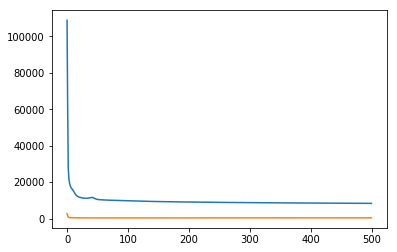

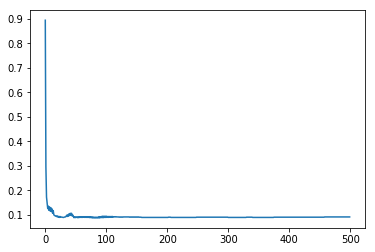

In [2]:
util.benchmark_full()

Reading in and transforming data...


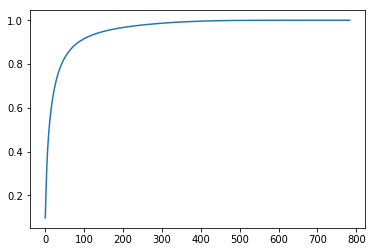

Performing logistic regression...
Cost at iteration 0: 112679.073342
('Error rate:', 0.901)
Cost at iteration 20: 13013.227330
('Error rate:', 0.087)
Cost at iteration 40: 11584.291019
('Error rate:', 0.082)
Cost at iteration 60: 10982.638587
('Error rate:', 0.077)
Cost at iteration 80: 10636.057974
('Error rate:', 0.075)
Cost at iteration 100: 10405.777675
('Error rate:', 0.074)
Cost at iteration 120: 10239.477224
('Error rate:', 0.073)
Cost at iteration 140: 10112.590314
('Error rate:', 0.074)
Cost at iteration 160: 10011.911706
('Error rate:', 0.075)
Cost at iteration 180: 9929.653747
('Error rate:', 0.077)
('Final error rate:', 0.077)


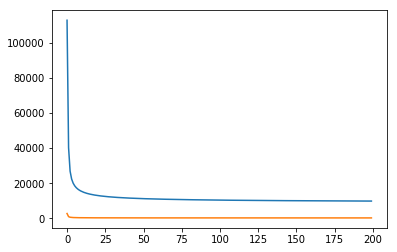

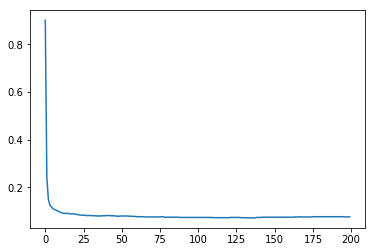

In [3]:
util.benchmark_pca()

What we should take away from this is that in the **PCA** example, we only needed 300 features to get comparable accuracy! This means that there is some linear transformation to a new vector of size 300 that can get comparable accuracy. Now, it may seem pretty handwavy to say this, but you can as a rough calculation, you could say that with a nonlinear neural network with 300 hidden units, we should be able to do just as good or even better than this!